In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 13s 3us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape,


((10000, 28, 28),)

In [10]:
len(test_labels)

10000

In [12]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Preprocess the data

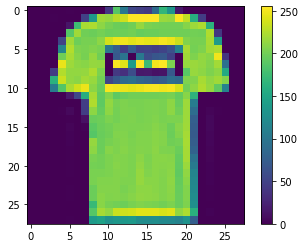

In [13]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

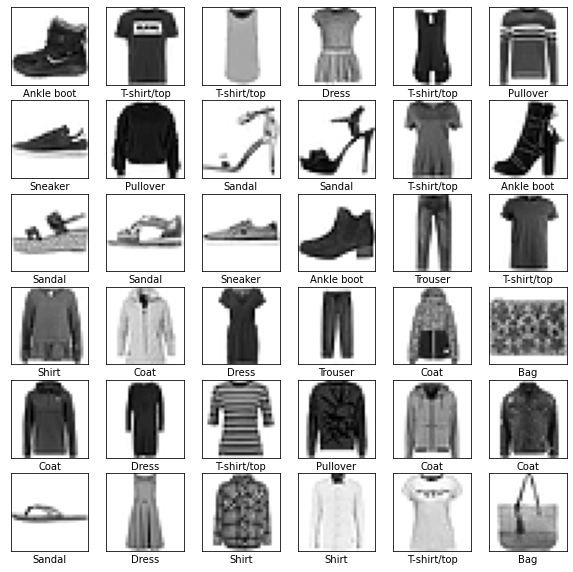

In [17]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2803 - accuracy: 0.8956
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9001
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9039
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2453 - accuracy: 0.9089
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2402 - accuracy: 0.9096
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2303 - accuracy: 0.9140
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2228 - accuracy: 0.9159
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2165 - accuracy: 0.9180
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2091 - accuracy: 0.9217
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.204

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3604 - accuracy: 0.8922

Test accuracy: 0.8921999931335449


# Make predictions

In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images)

In [28]:
predictions[1]

array([1.0438847e-05, 9.4798306e-17, 9.9961382e-01, 1.5553966e-13,
       2.3256925e-04, 3.3368365e-16, 1.4316716e-04, 2.5368444e-18,
       2.0272503e-13, 1.0073166e-13], dtype=float32)

In [30]:
np.argmax(predictions[1])

2

In [31]:
test_labels[1]

2

In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verify predictions

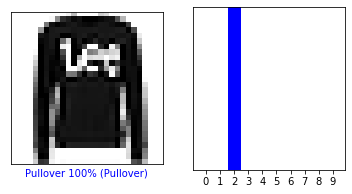

In [34]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

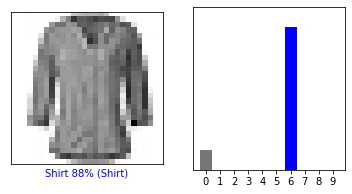

In [35]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

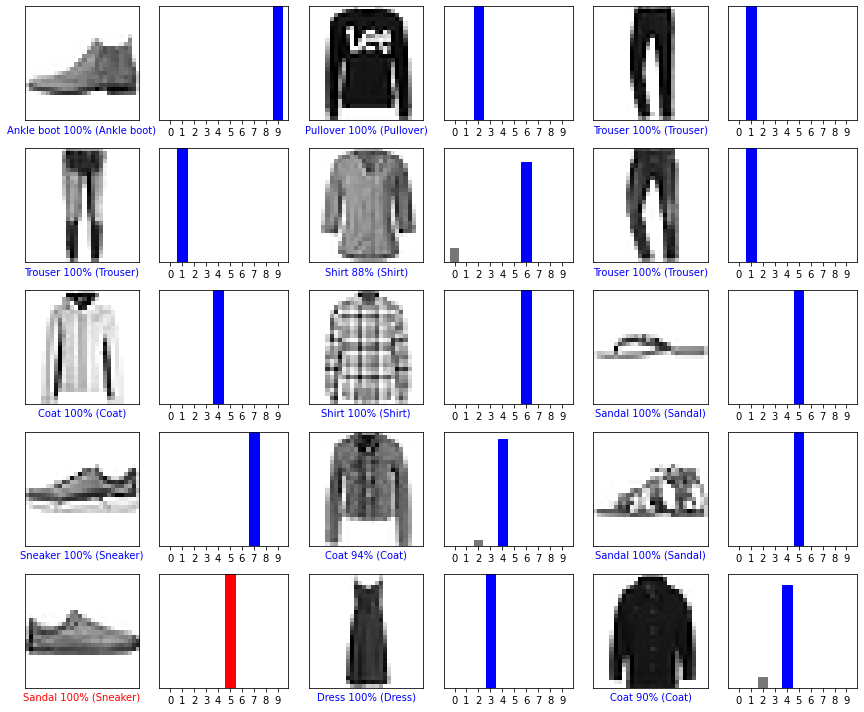

In [36]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model

In [38]:
# Grab an image from the test dataset.
img = test_images[5]

print(img.shape)

(28, 28)


In [39]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.8772512e-10 1.0000000e+00 4.4259142e-14 6.2288237e-11 1.6855430e-10
  4.2193823e-13 2.3054785e-09 5.8980202e-29 2.2437880e-17 2.8163833e-23]]


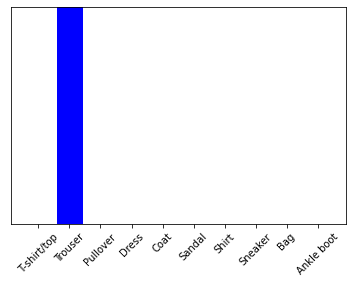

In [43]:
plot_value_array(5, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [44]:
np.argmax(predictions_single[0])

1